## Extention 7 
using graphs to examine different aspects of looped alliquot sequences

# line graphs of all the loops
Only graphing the values that are part of the loop. Not including the pre loop values

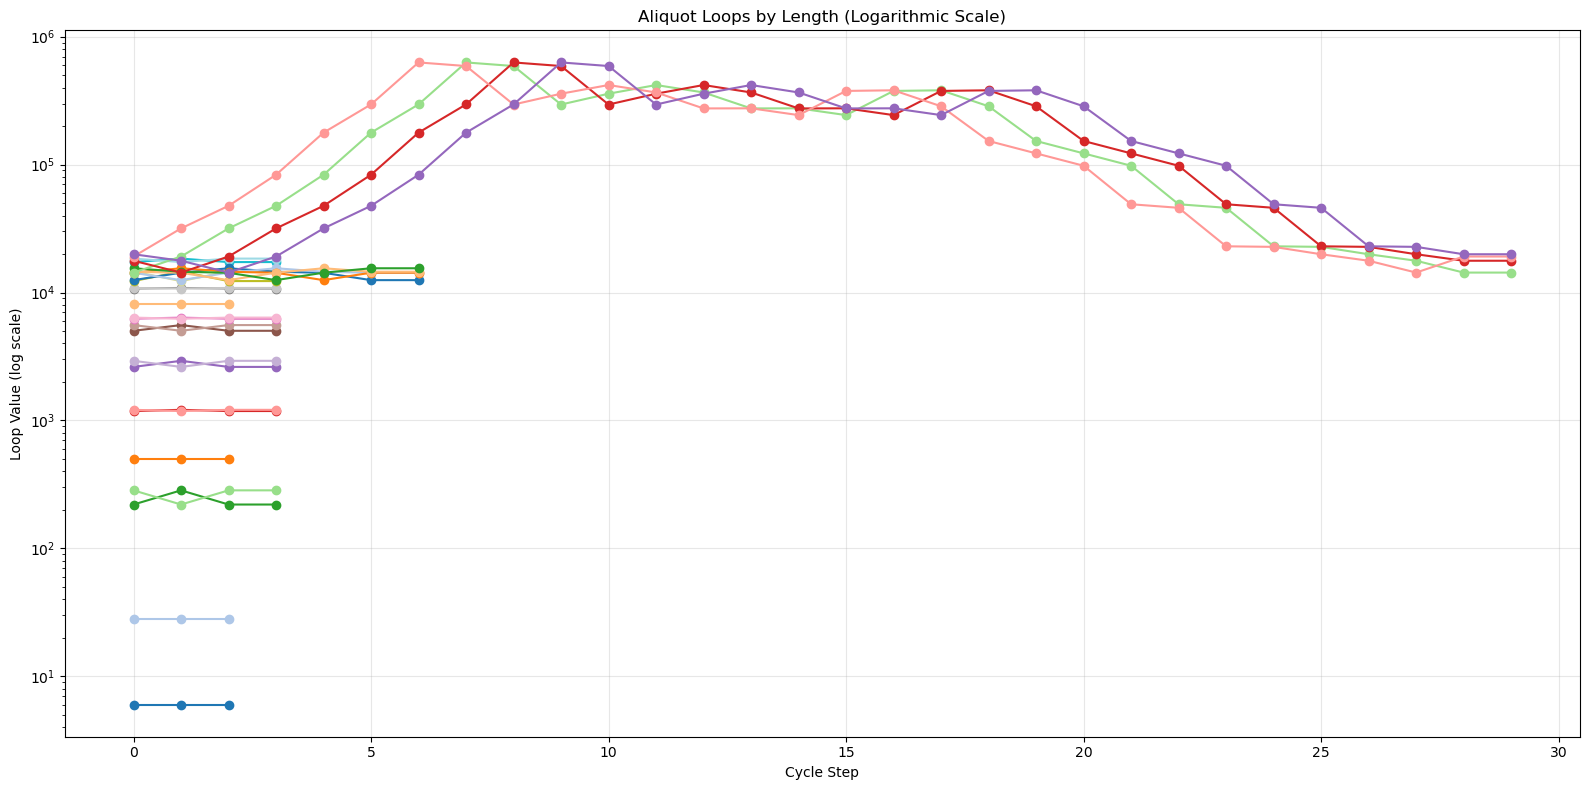

In [26]:
# Dictionary:
#   loop_length → set of loop tuples
import matplotlib.pyplot as plt
import numpy as np

loops_by_length = {}

for n in range(1, n_max + 1):
    seq, status = aliq_seq(n)

    if status == 'looped':

#find where the loop starts
        seen = {}
        for i, val in enumerate(seq):
            if val in seen:
                loop_start = seen[val]
                break
            seen[val] = i

        loop_cycle = seq[loop_start:]          # raw loop from seq
        loop_cycle = tuple(loop_cycle)         # convert to tuple


        # Store by loop length 
        L = len(loop_cycle)

        if L not in loops_by_length:
            loops_by_length[L] = set()

        loops_by_length[L].add(loop_cycle)


#print out all the lists
#print("\nALL ALIQUOT LOOPS SORTED BY LENGTH:\n")

#for L in sorted(loops_by_length.keys()):
    #print(f"Loop length {L}:")
    #for loop in sorted(loops_by_length[L]):
        #print("  ", loop)
    #print()



plt.figure(figsize=(16, 8))

colors = plt.cm.tab20  # colour map 
color_idx = 0

for L in sorted(loops_by_length.keys()):
    for loop in sorted(loops_by_length[L]):

        loop_list = list(loop)

        # close the loop 
        y_vals = loop_list + [loop_list[0]]
        x_vals = list(range(len(y_vals)))

        plt.plot(
            x_vals,
            y_vals,
            marker='o',
            color=colors(color_idx % 20),
            label=f"Len {L}: {loop_list[0]}…"
        )
        color_idx += 1

plt.yscale("log")
plt.xlabel("Cycle Step")
plt.ylabel("Loop Value (log scale)")
plt.title("Aliquot Loops by Length (Logarithmic Scale)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


This graph shows that all the loops have values which are close to each other. This is the case for all of except for the loop of length 28 where the values climb a lot before returning back down. This implies that if the values in a loop are far away from each other the the loop will be of a large period.

# Bar Chart
What we will try to show through a bar chart of width $1,000$ is whether the likelihood of a starting number resulting in a loop increases, decreases or stays the same as the starting number increases.

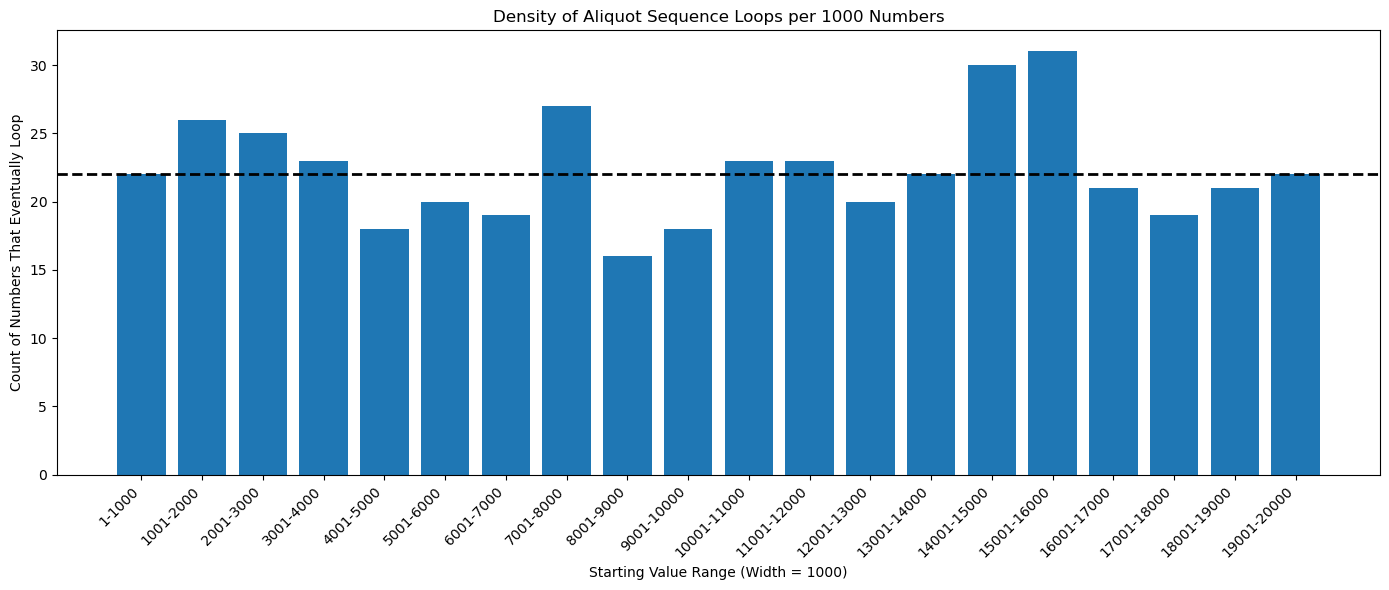

In [12]:
# Compute density (counts) of loop-starting numbers per 1000-wide band

band_width = 1000
num_bands = n_max // band_width

loop_counts = np.zeros(num_bands, dtype=int)

for start in range(1, n_max + 1):
    seq, status = aliq_seq(start)
    if status == "looped":
        band_index = (start - 1) // band_width
        loop_counts[band_index] += 1

# Plot the bar graph

import matplotlib.pyplot as plt

bands = [f"{i*band_width+1}-{(i+1)*band_width}" for i in range(num_bands)]

plt.figure(figsize=(14, 6))
plt.bar(range(num_bands), loop_counts)

plt.xticks(range(num_bands), bands, rotation=45, ha='right')
plt.xlabel("Starting Value Range (Width = 1000)")
plt.ylabel("Count of Numbers That Eventually Loop")
plt.title("Density of Aliquot Sequence Loops per 1000 Numbers")

#line of best fit
plt.axhline(y=22, color='black', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()


Here you can see that no matter what the starting value is the chance of an alliquot sequence entering a loop is of a uniform distribution as can clearly be seen with only a few fluctuations. From looking at the graph, you can come to the conclution that there are roughly 22 numbers which enter a loop, for every thousand checked (as shown by the line of best fit). Comparing this to the actual result of $446 / 20,000$ equating to 22.3 numbers entering. This shows that the graph is outputting the correct data.

# Scatter Graph 
Here we will look at how the first looped value compares to the starting input.

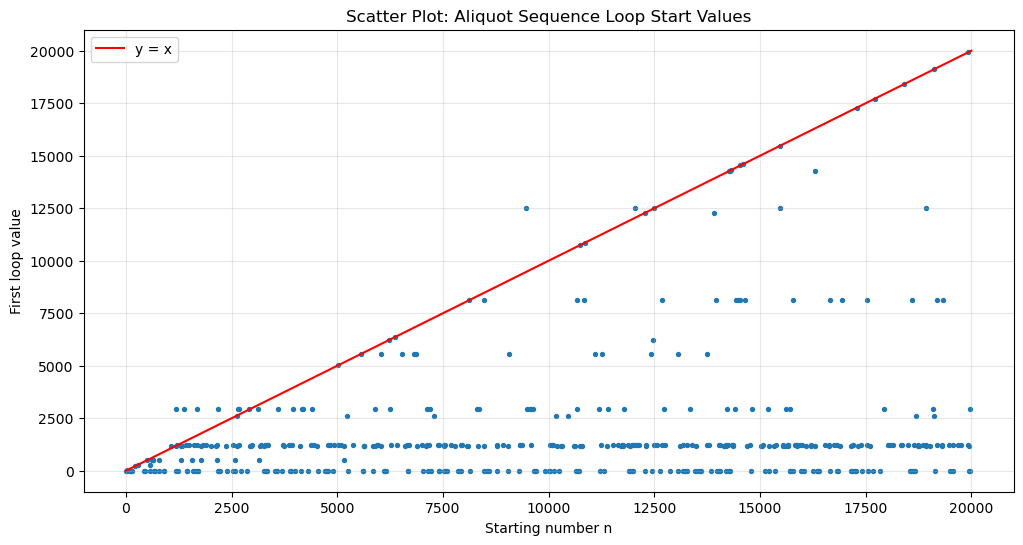

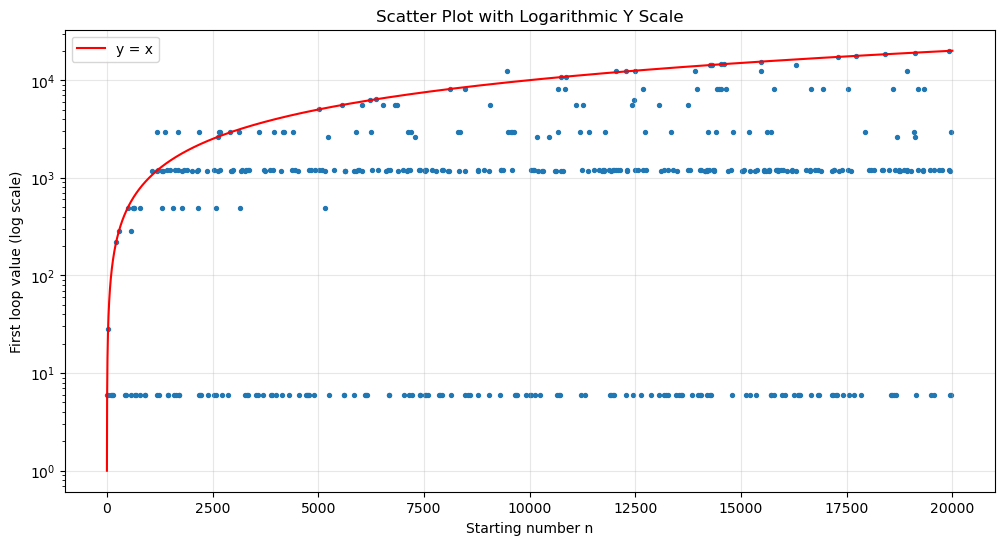

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Collect (start_n, first_loop_number)
loop_starts = []

for n in range(1, n_max + 1):
    seq, status = aliq_seq(n)
    if status == 'looped':

        # Detect the first loop value
        seen = {}
        for i, val in enumerate(seq):
            if val in seen:
                loop_start_value = val
                break
            seen[val] = i

        loop_starts.append((n, loop_start_value))

# Convert to lists for plotting
starts = np.array([p[0] for p in loop_starts])
loop_vals = np.array([p[1] for p in loop_starts])


#PLOT 
plt.figure(figsize=(12,6))
plt.scatter(starts, loop_vals, s=8)
plt.xlabel("Starting number n")
plt.ylabel("First loop value")
plt.title("Scatter Plot: Aliquot Sequence Loop Start Values")
plt.grid(True, alpha=0.3)

x = np.linspace(1, n_max, n_max)
plt.plot(x, x, color='red', label="y = x")

plt.legend()
plt.show()


# 2. LOG-SCALE PLOT (y-axis logarithmic)

plt.figure(figsize=(12,6))
plt.scatter(starts, loop_vals, s=8)
plt.xlabel("Starting number n")
plt.ylabel("First loop value (log scale)")
plt.title("Scatter Plot with Logarithmic Y Scale")
plt.yscale("log")
plt.grid(True, alpha=0.3)

plt.plot(x, x, color='red', label="y = x")

plt.legend()
plt.show()


Once more, this demonstrates how looped alliquot sequences are generally evenly spaced apart from each other. This scatter graph builds on this to show that most of the looped sequences enter the loop at smaller numbers 

It is also interesting to note that there seems to be a directly proportional relationship between starting number and the highest value for the first loop value. This shows that when a number in an alliquot sequence gets bigger then it is highly unlikely to reach a loop without it coming back down as the greatest values come from when it loops immediately. 

When looking at the logarithmic sclae, you can see that the most common loops to enter are the perfect number 6 and the amicable pair 1184,1210. This could be

# histogram of loop lengths
Used to see the distribution of different lengths.

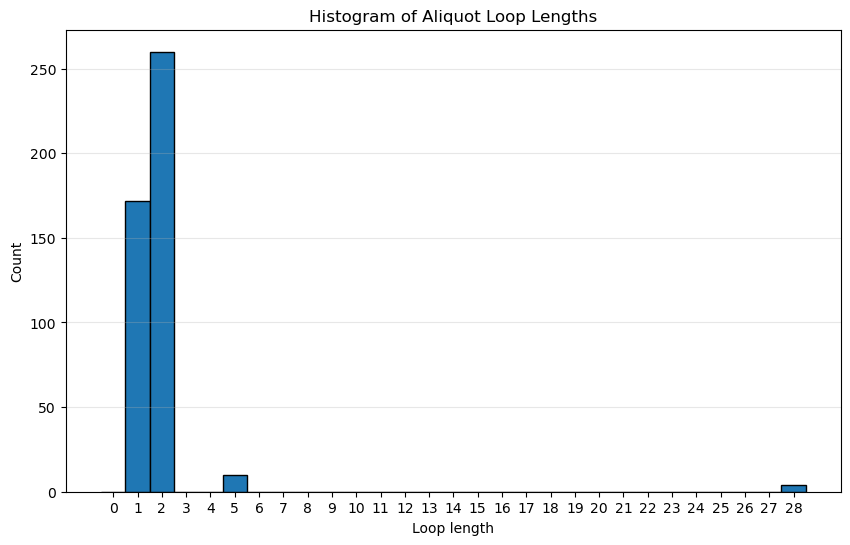

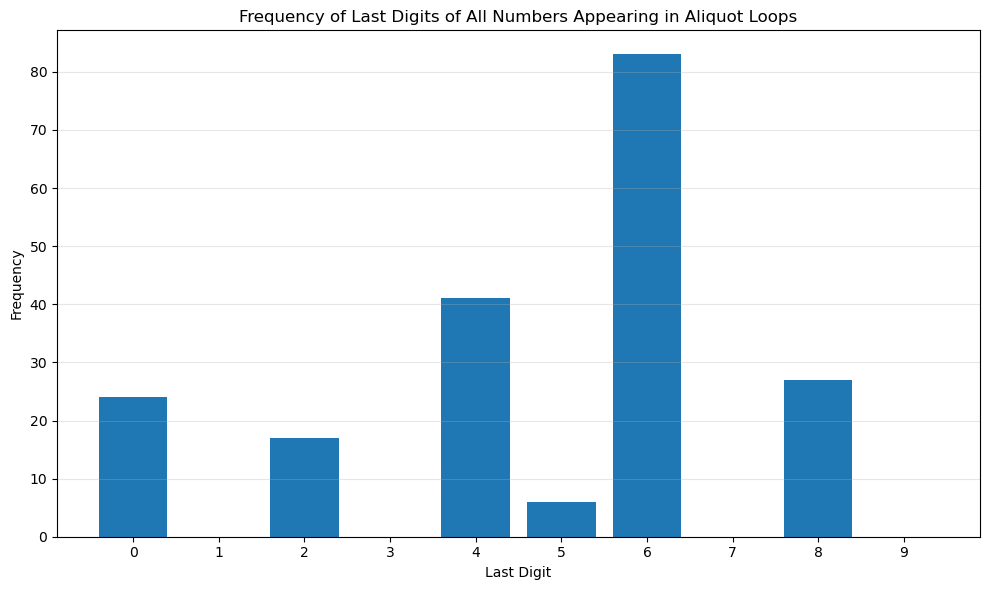

In [42]:
import matplotlib.pyplot as plt

# List to store adjusted cycle lengths
loop_lengths = []

for n in range(1, n_max + 1):
    seq, status = aliq_seq(n)
    if status == 'looped':

        # Find first repeated index
        seen = {}
        loop_start_index = None

        for i, val in enumerate(seq):
            if val in seen:
                loop_start_index = seen[val]
                break
            seen[val] = i

        # Extract loop
        loop_cycle = seq[loop_start_index:]
        loop_length = len(loop_cycle) - 1

        # Store loop_length 
        loop_lengths.append(loop_length)

#plot histogram
plt.figure(figsize=(10,6))

# histogram bins: from 0 up to max length
plt.hist(loop_lengths, 
         bins=range(0, max(loop_lengths)+2), 
         edgecolor='black', 
         align='left')

plt.xlabel("Loop length")
plt.ylabel("Count")
plt.title("Histogram of Aliquot Loop Lengths")
plt.xticks(range(0, max(loop_lengths)+1))
plt.grid(axis='y', alpha=0.3)

plt.show()

# Collect all numbers that appear in loops

loop_numbers = []

for loop in canonical_to_loop.values():
    loop_numbers.extend(loop)   # include duplicates *within* the loop


# Count last-digit frequencies

freq = {d: 0 for d in range(10)}

for num in loop_numbers:
    last_digit = num % 10
    freq[last_digit] += 1

# Plot bar chart

plt.figure(figsize=(10, 6))
plt.bar(freq.keys(), freq.values())

plt.xticks(range(10))
plt.xlabel("Last Digit")
plt.ylabel("Frequency")
plt.title("Frequency of Last Digits of All Numbers Appearing in Aliquot Loops")
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


This shows that the majority of sequences that end in a loop mostly end up at either at a perfect number or an amicable pair. This matches the findings from the previous graph as 6 is a perfect number and 1184 and 1210 are an amicable pair. 

It is interesting to note that we found no loops of length 3 or 4 but one for 5 existed. If you analyse the loops, they are either even $-->$ even or if they contain a last digit of 5 then they go to another 5. This indicates that any length of loop theoretically should exist. This can be seen by the bar above below. also highlighting how although possible, a loop containing odd numbers is highly unlikely. 

It is interesting how the number 6 is the most common last digit in looped sequences.